<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [44]:
# Imports
import numpy as np
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import spacy
from spacy.tokenizer import Tokenizer

In [30]:
path = '../module1-text-data/data/'

In [37]:
%pwd

'C:\\Users\\mathi\\Lambda_Repo\\Unit 4\\DS-Unit-4-Sprint-1-NLP\\module4-topic-modeling'

In [133]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19c.csv')

In [134]:
df2.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [132]:
df.head(10)

,id,tokens
0,AVpgNzjwLJeJML43Kpxn,"[order, item, bad, quality, missing, backup, s..."
1,AVpgNzjwLJeJML43Kpxn,"[bulk, expensive, way, products, like]"
2,AVpgNzjwLJeJML43Kpxn,"[duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,"[work, brand, batteries, better, price]"
4,AVpgNzjwLJeJML43Kpxn,"[batteries, long, lasting, price, great]"
5,AVpgNzjwLJeJML43Kpxn,"[bought, lot, batteries, christmas, amazonbasi..."
6,AVpgNzjwLJeJML43Kpxn,"[ive, problame, batteries, ordered, past, plea..."
7,AVpgNzjwLJeJML43Kpxn,"[looking, cheap, non, rechargeable, batteries,..."
8,AVpgNzjwLJeJML43Kpxn,"[hold, high, power, juice, like, energizer, du..."
9,AVpgNzjwLJeJML43Kpxn,"[amazonbasics, aa, aaa, batteries, appear, goo..."


In [128]:
df.shape

(28332, 2)

In [48]:
nlp = spacy.load("en_core_web_lg")

In [57]:
# Tokenize function
tokenizer = Tokenizer(nlp.vocab)

def tokenize(text):
    doc = nlp(text)
    
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [61]:
df['tokens'] = df['reviews.text'].apply(tokenize)

In [49]:
# def tokenize(document):
    
#     doc = nlp(document)
    
#     return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [66]:
# Reduce df to ID & tokens columns
df = df[['id', 'tokens']]

In [104]:
# Start of Gensim LDA topic model
id2word = corpora.Dictionary(df['tokens'])

In [98]:
id2word.token2id['wonderful']

751

In [99]:
len(id2word.keys())

9621

In [105]:
id2word.filter_extremes(no_below=5, no_above=0.95)

In [106]:
len(id2word.keys())

3581

In [119]:
corpus = [id2word.doc2bow(token) for token in df['tokens']]

In [127]:
len(corpus)

28332

In [120]:
# Finding optimal number of topics
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [121]:
%%time
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus,
                                                        start=2, 
                                                        limit=27, 
                                                        step=6,
                                                        passes=40)

Wall time: 15min 52s


In [122]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [123]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-2.622199,2,0
1,-2.623519,8,0
2,-2.683759,14,0
3,-2.798951,20,0
4,-2.844700,26,0


C:\Users\mathi\.conda\envs\U4-S1-NLP\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


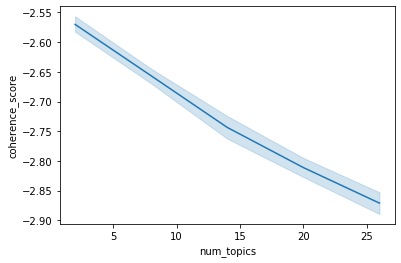

In [124]:
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [131]:
# Instantiating the LDA model
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics = 15,
                   passes=10,
                   workers=8
                  )

In [135]:
# Topics
lda.print_topics()

[(0,
  '0.036*"batteries" + 0.033*"battery" + 0.023*"amazon" + 0.022*"use" + 0.021*"good" + 0.014*"like" + 0.013*"great" + 0.011*"price" + 0.010*"life" + 0.009*"hours"'),
 (1,
  '0.092*"good" + 0.043*"price" + 0.023*"work" + 0.023*"tablet" + 0.020*"battery" + 0.016*"life" + 0.015*"amazon" + 0.015*"buy" + 0.013*"apps" + 0.012*"fine"'),
 (2,
  '0.032*"amazon" + 0.028*"play" + 0.023*"google" + 0.022*"store" + 0.020*"great" + 0.017*"tablet" + 0.014*"price" + 0.014*"apps" + 0.013*"better" + 0.012*"good"'),
 (3,
  '0.056*"love" + 0.035*"bought" + 0.034*"loves" + 0.033*"great" + 0.026*"daughter" + 0.026*"easy" + 0.022*"games" + 0.021*"christmas" + 0.021*"use" + 0.018*"gift"'),
 (4,
  '0.058*"use" + 0.054*"easy" + 0.034*"tablet" + 0.032*"great" + 0.028*"books" + 0.022*"read" + 0.018*"reading" + 0.016*"amazon" + 0.013*"bought" + 0.013*"kindle"'),
 (5,
  '0.080*"great" + 0.054*"product" + 0.036*"good" + 0.035*"works" + 0.028*"nice" + 0.026*"excellent" + 0.025*"tablet" + 0.025*"price" + 0.013*"sc

In [136]:
# Organize our topics
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [137]:
topics = [' '.join(t[0:5]) for t in words]

In [138]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
batteries battery amazon use good

------ Topic 1 ------
good price work tablet battery

------ Topic 2 ------
amazon play google store great

------ Topic 3 ------
love bought loves great daughter

------ Topic 4 ------
use easy tablet great books

------ Topic 5 ------
great product good works nice

------ Topic 6 ------
batteries long good great price

------ Topic 7 ------
alexa music sound tap echo

------ Topic 8 ------
device tablet like apps amazon

------ Topic 9 ------
tablet easy great use amazon

------ Topic 10 ------
old loves year bought tablet

------ Topic 11 ------
great price value recommend deal

------ Topic 12 ------
tablet kids great love apps

------ Topic 13 ------
kindle tablet screen new reading

------ Topic 14 ------
batteries amazon price great long



In [139]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [140]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\mathi\.conda\envs\U4-S1-NLP\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.246065 -0.073240       1        1  13.170761
12    -0.135320 -0.056919       2        1   9.196303
14     0.210923 -0.100499       3        1   9.083327
13    -0.043537  0.086067       4        1   8.336226
10    -0.185345 -0.173173       5        1   7.558702
4     -0.088005  0.055925       6        1   7.112571
3     -0.182644 -0.067034       7        1   6.531714
11     0.060577  0.130366       8        1   5.647665
2     -0.020673  0.043956       9        1   5.595450
0      0.163747 -0.067314      10        1   5.031285
5     -0.020201  0.131391      11        1   4.878918
1      0.100039  0.023003      12        1   4.815600
8     -0.059130 -0.036018      13        1   4.813238
9     -0.041397  0.037725      14        1   4.192139
7     -0.005100  0.065762      15        1   4.036097, topic_info=     Category         Freq       Term        Total  loglift  logprob
18    Default  7573.000000  batteries  7573.000000  30.0000  30.0000
21    Default  8935.000000      great  8935.000000  29.0000  29.0000
34    Default  5643.000000       good  5643.000000  28.0000  28.0000
2432  Default  6783.000000     tablet  6783.000000  27.0000  27.0000
1857  Default  2146.000000      loves  2146.000000  26.0000  26.0000
755   Default  2924.000000       easy  2924.000000  25.0000  25.0000
17    Default  4972.000000      price  4972.000000  24.0000  24.0000
521   Default  2109.000000        old  2109.000000  23.0000  23.0000
2075  Default  3010.000000     kindle  3010.000000  22.0000  22.0000
165   Default  2016.000000    product  2016.000000  21.0000  21.0000
105   Default  1753.000000       year  1753.000000  20.0000  20.0000
192   Default  2389.000000       kids  2389.000000  19.0000  19.0000
90    Default  3392.000000       love  3392.000000  18.0000  18.0000
94    Default  4485.000000        use  4485.000000  17.0000  17.0000
20    Default  1273.000000      brand  1273.000000  16.0000  16.0000
23    Default  2424.000000       long  2424.000000  15.0000  15.0000
2     Default  2107.000000    battery  2107.000000  14.0000  14.0000
652   Default  1682.000000      games  1682.000000  13.0000  13.0000
96    Default  1483.000000      works  1483.000000  12.0000  12.0000
387   Default  1009.000000      value  1009.000000  11.0000  11.0000
24    Default  3892.000000     amazon  3892.000000  10.0000  10.0000
9     Default  2225.000000       work  2225.000000   9.0000   9.0000
1268  Default   908.000000   daughter   908.000000   8.0000   8.0000
1548  Default  1815.000000       apps  1815.000000   7.0000   7.0000
409   Default  1193.000000       play  1193.000000   6.0000   6.0000
28    Default  3139.000000     bought  3139.000000   5.0000   5.0000
2086  Default  1471.000000      books  1471.000000   4.0000   4.0000
74    Default   861.000000     brands   861.000000   3.0000   3.0000
2865  Default   523.000000     google   523.000000   2.0000   2.0000
235   Default  1066.000000     device  1066.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
1354  Topic15    81.933319     listen   135.912933   2.7038  -5.0206
1259  Topic15    44.739159    weather    68.424606   2.7850  -5.6256
731   Topic15    53.222878      cable    84.770470   2.7444  -5.4520
1705  Topic15    50.531261  listening    88.497269   2.6495  -5.5039
850   Topic15    57.261074        ask   113.680176   2.5241  -5.3788
1137  Topic15    38.447895      smart    67.378395   2.6489  -5.7772
766   Topic15    72.647377     button   160.304916   2.4184  -5.1409
1443  Topic15    92.474815     laptop   231.332916   2.2930  -4.8995
533   Topic15    52.109627       room   108.394386   2.4775  -5.4731
1064  Topic15    37.466461        usb    70.583862   2.5765  -5.8030
1731  Topic15    35.067905     volume    64.542908   2.5998  -5.8692
425   Topic15    92.395088       home   317.693207   1.9749  -4.9004
289

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling